In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib.request 
import os
data_file = "airfoil.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")
    
af_data = pd.read_csv('airfoil.csv', header=None, delimiter="\t")

headers =  ["Frequency (Hz)","Angle of Attack (degrees)","Chord Length (m)","Free-stream Velocity (m/s)","Suction Side Displacement thickness (m)","Scaled Sound Pressure Level (dB)"]
af_data.columns = headers

af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
def Category(x):
    if x < 120  :
        return "Safe"
    else:
        return "Not Safe"

In [4]:
af_data['Categorized Sound Level'] = af_data.iloc[:,5]
af_data['Categorized Sound Level'] = af_data['Categorized Sound Level'].map(Category)

In [5]:
af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB),Categorized Sound Level
0,800,0.0,0.3048,71.3,0.002663,126.201,Not Safe
1,1000,0.0,0.3048,71.3,0.002663,125.201,Not Safe
2,1250,0.0,0.3048,71.3,0.002663,125.951,Not Safe
3,1600,0.0,0.3048,71.3,0.002663,127.591,Not Safe
4,2000,0.0,0.3048,71.3,0.002663,127.461,Not Safe


In [6]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X = af_data.iloc[:, [0,1,2, 3, 4]].values
y = af_data.iloc[:, 6].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto', max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Predict probabilities
probs_y=classifier.predict_proba(X_test)

We will now print out the results for the test set.  The first column corresponds to the test labels (correct values), the second column corresponds to the prediction.  The last 2 columns give the probability of the two possibilities.  Thus for the first row,  Not Safe is predicted to be Not Safe with 95% probability, but with a 5% chance of being Not Safe.

In [10]:
data = {'Correct label':y_test, 'Predicted label':y_pred, 'Probability Not Safe':probs_y[:,0],
       'Probability Safe':probs_y[:,1]}
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
df

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.948090,0.051910
1,Safe,Safe,0.449861,0.550139
2,Safe,Safe,0.324803,0.675197
3,Safe,Not Safe,0.973271,0.026729
4,Not Safe,Not Safe,0.862133,0.137867
...,...,...,...,...
371,Not Safe,Not Safe,0.997692,0.002308
372,Safe,Safe,0.345750,0.654250
373,Not Safe,Not Safe,0.977370,0.022630
374,Not Safe,Not Safe,0.997633,0.002367


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[275   5]
 [ 35  61]]


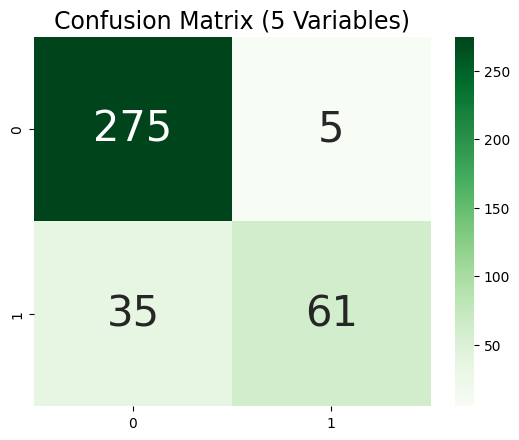

In [12]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Greens", ax = ax )
ax.set_title('Confusion Matrix (5 Variables)', fontsize=17)
plt.show()

I want to see the p-value on this like we did in lab 3, so I searched how to do that and came across the top answer in the comments here: https://stackoverflow.com/questions/22306341/python-sklearn-how-to-calculate-p-values

Here are my results after running this.

In [13]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train == "Safe",sm.add_constant(X_train))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.315928
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1127
Model:                          Logit   Df Residuals:                     1121
Method:                           MLE   Df Model:                            5
Date:                Mon, 08 May 2023   Pseudo R-squ.:                  0.4196
Time:                        03:14:16   Log-Likelihood:                -356.05
converged:                       True   LL-Null:                       -613.50
Covariance Type:            nonrobust   LLR p-value:                4.880e-109
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1712      0.140    -15.516      0.000      -2.445      -1.897
x1             2.0791      0.

Recall what we noticed in a previous lab. We observed that there was a correlation between two input variables (angle of attack and suction side displacement). Due to this realization, it may be beneficial to perform multivariable logistic regression without one of these variables. Since I don't have a valid argument for why I would choose one over the other, I will do multivariable regression without angle of attack and do it again without suction side displacement. This will allow me to choose which variable may be more useful without using both and having the issue of collinearity.
I will calculate the covariance matrix of the data to really see if there's a correlation. 

However, after calculating the covariance matrix, I want to test the data the same way we did it at the end of lab 4. Then I will try multivariable testing while removing theses variables.

In [14]:
af_data1 = af_data.drop(columns = ['Categorized Sound Level'])
af_data1.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

af_data_temp = af_data1
af_data_scaled = min_max_scaler.fit_transform(af_data_temp)
af_data_norm = pd.DataFrame(af_data_scaled,columns=af_data1.columns)

af_data_norm.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


In [16]:
af_data_norm.cov()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
Frequency (Hz),0.025351,-0.011578,-0.000195,0.008369,-0.008305,-0.011412
Angle of Attack (degrees),-0.011578,0.071066,-0.045059,0.006160,0.045528,-0.007634
Chord Length (m),-0.000195,-0.045059,0.112085,0.000499,-0.016760,-0.014504
Free-stream Velocity (m/s),0.008369,0.006160,0.000499,0.154647,-0.000354,0.009025
Suction Side Displacement thickness (m),-0.008305,0.045528,-0.016760,-0.000354,0.051387,-0.013002
Scaled Sound Pressure Level (dB),-0.011412,-0.007634,-0.014504,0.009025,-0.013002,0.033651


This is a little disappointing. I don't see any strong correlation between anything, so my previous plan doesn't seem very worthwhile. I will still perform multiple variable regression while removing variables, but now I don't have a good idea for where to start with removing them.

In [17]:
import sklearn.metrics as metrics

In [18]:
af_data_norm2 = af_data_norm.drop(columns = ['Frequency (Hz)','Chord Length (m)','Free-stream Velocity (m/s)','Scaled Sound Pressure Level (dB)'])

header = ["AoA","SSDT"]
af_data_norm2.columns = header

af_data_norm2.head()

,AoA,SSDT
0,0.0,0.039005
1,0.0,0.039005
2,0.0,0.039005
3,0.0,0.039005
4,0.0,0.039005


In [19]:
af_data_norm2.cov()

,AoA,SSDT
AoA,0.071066,0.045528
SSDT,0.045528,0.051387


I made this covariance matrix for the poster presentation. It'll fit better and be easier to read than the other covariance matrix (and showcases only the variables I was discussing).

In [20]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label="Safe"))
print("Recall:", metrics.recall_score(y_test, y_pred, pos_label="Not Safe"))

Accuracy: 0.8936170212765957
Precision: 0.9242424242424242
Recall: 0.9821428571428571


In [21]:
X1 = X
y1 = y

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X1, y1);

In [23]:
from sklearn.metrics import accuracy_score
scores = []
 
# using regression to get predicted data
model=LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto', max_iter=500)

for train_index, test_index in sss.split(X1, y1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores)

[0.7978723404255319, 0.7992021276595744, 0.776595744680851, 0.8297872340425532, 0.7872340425531915]


#### Not using angle of attack

In [24]:
# Splitting the dataset into the Training set and Test set
X1 = af_data.iloc[:, [0, 2, 3, 4]].values
y1 = af_data.iloc[:, 6].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 3)

In [25]:
classifier.fit(X1_train,y1_train)

LogisticRegression(max_iter=500, random_state=0)

In [26]:
# Predicting the Test set results
y1_pred = classifier.predict(X1_test)

# Predict probabilities
probs_y1=classifier.predict_proba(X1_test)

In [27]:
data1 = {'Correct label':y1_test, 'Predicted label':y1_pred, 'Probability Not Safe':probs_y1[:,0],
       'Probability Safe':probs_y1[:,1]}
# Create DataFrame
df1 = pd.DataFrame(data1)
 
# Print the output.
df1

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.905725,0.094275
1,Not Safe,Not Safe,0.822837,0.177163
2,Not Safe,Not Safe,0.857172,0.142828
3,Not Safe,Safe,0.440357,0.559643
4,Safe,Safe,0.480544,0.519456
...,...,...,...,...
371,Not Safe,Not Safe,0.784421,0.215579
372,Not Safe,Not Safe,0.732868,0.267132
373,Not Safe,Not Safe,0.846505,0.153495
374,Not Safe,Not Safe,0.567225,0.432775


In [28]:
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[280  18]
 [ 53  25]]


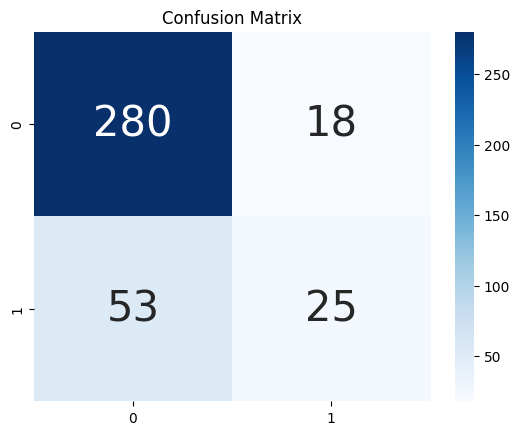

In [29]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [30]:
sss.get_n_splits(X1, y1);

In [31]:
scores1 = []
 
# using regression to get predicted data
model=LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto', max_iter=500)

for train_index, test_index in sss.split(X1, y1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores1.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores1)

[0.7845744680851063, 0.8098404255319149, 0.7792553191489362, 0.776595744680851, 0.7898936170212766]


#### Not using suction side displacement

In [32]:
X2 = af_data.iloc[:, [0, 1, 2, 3]].values
y2 = af_data.iloc[:, 6].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 3)

In [33]:
classifier.fit(X2_train,y2_train)

LogisticRegression(max_iter=500, random_state=0)

In [34]:
# Predicting the Test set results
y2_pred = classifier.predict(X2_test)

# Predict probabilities
probs_y2=classifier.predict_proba(X2_test)

In [35]:
data2 = {'Correct label':y2_test, 'Predicted label':y2_pred, 'Probability Not Safe':probs_y2[:,0],
       'Probability Safe':probs_y2[:,1]}
# Create DataFrame
df2 = pd.DataFrame(data2)
 
# Print the output.
df2

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.905550,0.094450
1,Not Safe,Not Safe,0.857781,0.142219
2,Not Safe,Not Safe,0.693885,0.306115
3,Not Safe,Not Safe,0.502434,0.497566
4,Safe,Safe,0.438896,0.561104
...,...,...,...,...
371,Not Safe,Not Safe,0.818714,0.181286
372,Not Safe,Not Safe,0.922129,0.077871
373,Not Safe,Not Safe,0.648322,0.351678
374,Not Safe,Not Safe,0.684877,0.315123


In [36]:
cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[282  16]
 [ 41  37]]


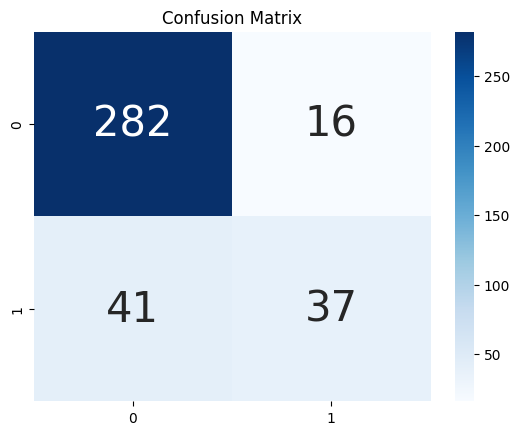

In [37]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show();

In [38]:
sss.get_n_splits(X2, y2);

In [39]:
scores2 = []

for train_index, test_index in sss.split(X2, y2):
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = y2[train_index], y2[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores2.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores2)

[0.7978723404255319, 0.7992021276595744, 0.776595744680851, 0.8297872340425532, 0.8164893617021277]


When looking at the accuracy of these predictions, it seems that not using suction side displacement thickness is producing the more accurate results when compared to using all of the variables and when compared to using all of the variables except for angle of attack. This suggests to me that a model that only utilizes frequency, angle of attack, chord length, and free-stream velocity will be a more accurate model than the other two combinations tested out.

*Note*: The accuracy of each prediction for this test data is the exact same in sets 1, 2, 3, and 5 as in the test sets for using all input variables. It did improve for set 4. Because it was the same in all sets except for one (where it showed improvement) I will choose to believe that means it is the better model.

#### Not using frequency

In [40]:
X3 = af_data.iloc[:, [1, 2, 3, 4]].values
y3 = af_data.iloc[:, 6].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state = 3)

In [41]:
classifier.fit(X3_train,y3_train)

LogisticRegression(max_iter=500, random_state=0)

In [42]:
# Predicting the Test set results
y3_pred = classifier.predict(X3_test)

# Predict probabilities
probs_y3=classifier.predict_proba(X3_test)

In [43]:
data3 = {'Correct label':y3_test, 'Predicted label':y3_pred, 'Probability Not Safe':probs_y3[:,0],
       'Probability Safe':probs_y3[:,1]}
# Create DataFrame
df3 = pd.DataFrame(data3)
 
# Print the output.
df3

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.802039,0.197961
1,Not Safe,Not Safe,0.816054,0.183946
2,Not Safe,Not Safe,0.615852,0.384148
3,Not Safe,Not Safe,0.855394,0.144606
4,Safe,Not Safe,0.752235,0.247765
...,...,...,...,...
371,Not Safe,Not Safe,0.767226,0.232774
372,Not Safe,Not Safe,0.864611,0.135389
373,Not Safe,Not Safe,0.683553,0.316447
374,Not Safe,Not Safe,0.855394,0.144606


In [44]:
cm = confusion_matrix(y3_test, y3_pred)
print(cm)

[[298   0]
 [ 78   0]]


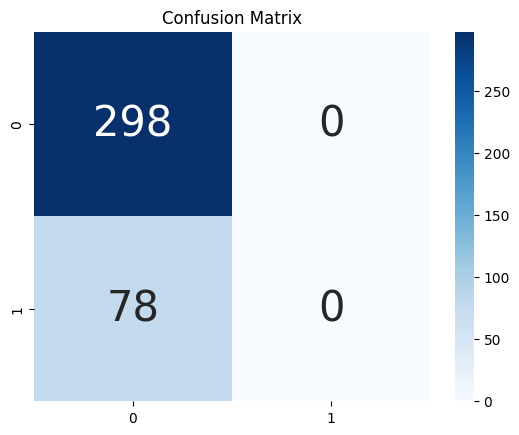

In [45]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [46]:
sss.get_n_splits(X3, y3);

In [47]:
scores3 = []

for train_index, test_index in sss.split(X3, y3):
    X_train, X_test = X3[train_index], X3[test_index]
    y_train, y_test = y3[train_index], y3[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores3.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores3)

[0.7606382978723404, 0.7526595744680851, 0.7526595744680851, 0.7606382978723404, 0.7606382978723404]


This is the worst set of accuracy scores so far.

It should also be noted that the model just assumed everything was Not Safe. That's not good.

#### Not using chord length

In [48]:
X4 = af_data.iloc[:, [0, 1, 3, 4]].values
y4 = af_data.iloc[:, 6].values
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.25, random_state = 3)

classifier.fit(X4_train,y4_train)

LogisticRegression(max_iter=500, random_state=0)

In [49]:
# Predicting the Test set results
y4_pred = classifier.predict(X4_test)

# Predict probabilities
probs_y4=classifier.predict_proba(X4_test)

data4 = {'Correct label':y4_test, 'Predicted label':y4_pred, 'Probability Not Safe':probs_y4[:,0],
       'Probability Safe':probs_y4[:,1]}
# Create DataFrame
df4 = pd.DataFrame(data4)
 
# Print the output.
df4

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.856324,0.143676
1,Not Safe,Not Safe,0.772939,0.227061
2,Not Safe,Not Safe,0.667508,0.332492
3,Not Safe,Safe,0.324300,0.675700
4,Safe,Safe,0.468623,0.531377
...,...,...,...,...
371,Not Safe,Not Safe,0.724062,0.275938
372,Not Safe,Not Safe,0.886327,0.113673
373,Not Safe,Not Safe,0.624609,0.375391
374,Not Safe,Safe,0.489637,0.510363


In [50]:
cm = confusion_matrix(y4_test, y4_pred)
print(cm)

[[270  28]
 [ 51  27]]


In [51]:
sss.get_n_splits(X4, y4);

scores4 = []

for train_index, test_index in sss.split(X4, y4):
    X_train, X_test = X4[train_index], X4[test_index]
    y_train, y_test = y4[train_index], y4[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores4.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores4)

[0.7978723404255319, 0.7898936170212766, 0.773936170212766, 0.7779255319148937, 0.7845744680851063]


#### Not using free-stream velocity

In [52]:
X5 = af_data.iloc[:, [0, 1, 2, 4]].values
y5 = af_data.iloc[:, 6].values
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.25, random_state = 3)

classifier.fit(X5_train,y5_train)

LogisticRegression(max_iter=500, random_state=0)

In [53]:
# Predicting the Test set results
y5_pred = classifier.predict(X5_test)

# Predict probabilities
probs_y5=classifier.predict_proba(X5_test)

data5 = {'Correct label':y5_test, 'Predicted label':y5_pred, 'Probability Not Safe':probs_y5[:,0],
       'Probability Safe':probs_y5[:,1]}
# Create DataFrame
df5 = pd.DataFrame(data5)
 
# Print the output.
df5

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.745713,0.254287
1,Not Safe,Not Safe,0.731873,0.268127
2,Not Safe,Not Safe,0.767186,0.232814
3,Not Safe,Safe,0.420765,0.579235
4,Safe,Not Safe,0.567737,0.432263
...,...,...,...,...
371,Not Safe,Not Safe,0.805454,0.194546
372,Not Safe,Not Safe,0.854539,0.145461
373,Not Safe,Not Safe,0.593254,0.406746
374,Not Safe,Not Safe,0.573516,0.426484


In [54]:
cm = confusion_matrix(y5_test, y5_pred)
print(cm)

[[278  20]
 [ 52  26]]


In [55]:
sss.get_n_splits(X5, y5);

scores5 = []

for train_index, test_index in sss.split(X5, y5):
    X_train, X_test = X5[train_index], X5[test_index]
    y_train, y_test = y5[train_index], y5[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores5.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores5)

[0.7792553191489362, 0.8271276595744681, 0.7965425531914894, 0.7925531914893617, 0.7699468085106383]


This looks a little promising.

These accuracy scores seem almost as good as the accuracy scores when removing suction side displacement. I'm going to compare them.

In [56]:
a = np.array(scores2)
b = np.array(scores5)
a-b

array([ 0.01861702, -0.02792553, -0.01994681,  0.03723404,  0.04654255])

The accuracy scores of the model without suction side displacement are the best, so I will look a little deeper with that model and then also look at models with less variables as well to see if there is any possible improvement when using less variables.

Looking at coefficients of the fitited model for all variables except suction side displacement.

In [57]:
for train_index, test_index in sss.split(X2, y2):
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = y2[train_index], y2[test_index]
    
    regress_4vars = model.fit(X_train, y_train)

print(regress_4vars.coef_)
print(regress_4vars.intercept_)

[[ 4.33757313e-04  2.03695207e-01  5.69216641e+00 -2.76703683e-02]]
[-3.51898132]


We can clearly see that in this model, the variable with the largest coefficient is chord length. That may not mean that it is the most important, but could be something to keep in mind (similarly, frequency looks least important).

#### Dropping Frequency and Suction Side Displacement Thickness

In [58]:
X6 = af_data.iloc[:, [1, 2, 3]].values
y6 = af_data.iloc[:, 6].values
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.25, random_state = 3)

classifier.fit(X6_train,y6_train)

LogisticRegression(max_iter=500, random_state=0)

In [59]:
y6_pred = classifier.predict(X6_test)

# Predict probabilities
probs_y6=classifier.predict_proba(X6_test)

data6 = {'Correct label':y6_test, 'Predicted label':y6_pred, 'Probability Not Safe':probs_y6[:,0],
       'Probability Safe':probs_y6[:,1]}
# Create DataFrame
df6 = pd.DataFrame(data6)
 
# Print the output.
df6

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.801724,0.198276
1,Not Safe,Not Safe,0.815294,0.184706
2,Not Safe,Not Safe,0.616125,0.383875
3,Not Safe,Not Safe,0.854943,0.145057
4,Safe,Not Safe,0.751580,0.248420
...,...,...,...,...
371,Not Safe,Not Safe,0.766173,0.233827
372,Not Safe,Not Safe,0.864909,0.135091
373,Not Safe,Not Safe,0.683756,0.316244
374,Not Safe,Not Safe,0.854943,0.145057


In [60]:
cm = confusion_matrix(y6_test, y6_pred)
print(cm)

[[294   4]
 [ 76   2]]


In [61]:
sss.get_n_splits(X6, y6);

scores6 = []

for train_index, test_index in sss.split(X6, y6):
    X_train, X_test = X6[train_index], X6[test_index]
    y_train, y_test = y6[train_index], y6[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores6.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores6)

[0.7606382978723404, 0.7526595744680851, 0.7526595744680851, 0.7606382978723404, 0.7606382978723404]


#### Dropping angle of attack and suction side displacement

In [62]:
X7 = af_data.iloc[:, [0, 2, 3]].values
y7 = af_data.iloc[:, 6].values
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.25, random_state = 3)

classifier.fit(X7_train,y7_train)

LogisticRegression(max_iter=500, random_state=0)

In [63]:
y7_pred = classifier.predict(X7_test)

# Predict probabilities
probs_y7=classifier.predict_proba(X7_test)

data7 = {'Correct label':y7_test, 'Predicted label':y7_pred, 'Probability Not Safe':probs_y7[:,0],
       'Probability Safe':probs_y7[:,1]}
# Create DataFrame
df7 = pd.DataFrame(data7)
 
# Print the output.
df7

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.904057,0.095943
1,Not Safe,Not Safe,0.818867,0.181133
2,Not Safe,Not Safe,0.856517,0.143483
3,Not Safe,Safe,0.432742,0.567258
4,Safe,Safe,0.480296,0.519704
...,...,...,...,...
371,Not Safe,Not Safe,0.779662,0.220338
372,Not Safe,Not Safe,0.731396,0.268604
373,Not Safe,Not Safe,0.845917,0.154083
374,Not Safe,Not Safe,0.559059,0.440941


In [64]:
cm = confusion_matrix(y7_test, y7_pred)
print(cm)

[[280  18]
 [ 54  24]]


In [65]:
sss.get_n_splits(X7, y7);

scores7 = []

for train_index, test_index in sss.split(X7, y7):
    X_train, X_test = X7[train_index], X7[test_index]
    y_train, y_test = y7[train_index], y7[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores7.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores7)

[0.7845744680851063, 0.8098404255319149, 0.7792553191489362, 0.776595744680851, 0.7898936170212766]


#### Dropping chord length and suction side displacement

In [66]:
X8 = af_data.iloc[:, [0, 1, 3]].values
y8 = af_data.iloc[:, 6].values
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size = 0.25, random_state = 3)

classifier.fit(X8_train,y8_train)

LogisticRegression(max_iter=500, random_state=0)

In [67]:
y8_pred = classifier.predict(X8_test)

# Predict probabilities
probs_y8=classifier.predict_proba(X8_test)

data8 = {'Correct label':y8_test, 'Predicted label':y8_pred, 'Probability Not Safe':probs_y8[:,0],
       'Probability Safe':probs_y8[:,1]}
# Create DataFrame
df8 = pd.DataFrame(data8)
 
# Print the output.
df8

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.856393,0.143607
1,Not Safe,Not Safe,0.772840,0.227160
2,Not Safe,Not Safe,0.667364,0.332636
3,Not Safe,Safe,0.324092,0.675908
4,Safe,Safe,0.468408,0.531592
...,...,...,...,...
371,Not Safe,Not Safe,0.723702,0.276298
372,Not Safe,Not Safe,0.886301,0.113699
373,Not Safe,Not Safe,0.624749,0.375251
374,Not Safe,Safe,0.489355,0.510645


In [68]:
cm = confusion_matrix(y8_test, y8_pred)
print(cm)

[[270  28]
 [ 51  27]]


In [69]:
sss.get_n_splits(X8, y8);

scores8 = []

for train_index, test_index in sss.split(X8, y8):
    X_train, X_test = X8[train_index], X8[test_index]
    y_train, y_test = y8[train_index], y8[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores8.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores8)

[0.7978723404255319, 0.7898936170212766, 0.7752659574468085, 0.7779255319148937, 0.7845744680851063]


#### Dropping free-stream velocity and suction side displacement

In [70]:
X9 = af_data.iloc[:, [0, 1, 2]].values
y9 = af_data.iloc[:, 6].values
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size = 0.25, random_state = 3)

classifier.fit(X9_train,y9_train)

LogisticRegression(max_iter=500, random_state=0)

In [71]:
y9_pred = classifier.predict(X9_test)

# Predict probabilities
probs_y9=classifier.predict_proba(X9_test)

data9 = {'Correct label':y9_test, 'Predicted label':y9_pred, 'Probability Not Safe':probs_y9[:,0],
       'Probability Safe':probs_y9[:,1]}
# Create DataFrame
df9 = pd.DataFrame(data9)
 
# Print the output.
df9

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.745687,0.254313
1,Not Safe,Not Safe,0.731828,0.268172
2,Not Safe,Not Safe,0.767193,0.232807
3,Not Safe,Safe,0.420744,0.579256
4,Safe,Not Safe,0.567718,0.432282
...,...,...,...,...
371,Not Safe,Not Safe,0.805414,0.194586
372,Not Safe,Not Safe,0.854524,0.145476
373,Not Safe,Not Safe,0.593274,0.406726
374,Not Safe,Not Safe,0.573481,0.426519


In [72]:
cm = confusion_matrix(y9_test, y9_pred)
print(cm)

[[278  20]
 [ 52  26]]


In [73]:
sss.get_n_splits(X9, y9);

scores9 = []

for train_index, test_index in sss.split(X9, y9):
    X_train, X_test = X9[train_index], X9[test_index]
    y_train, y_test = y9[train_index], y9[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores9.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores9)

[0.7792553191489362, 0.8271276595744681, 0.7965425531914894, 0.7925531914893617, 0.7699468085106383]


These accuracy scores look pretty satisfying so far. Out of all the three variable models, this one looks the best.

In [74]:
c = np.array(scores9)
a - c

array([ 0.01861702, -0.02792553, -0.01994681,  0.03723404,  0.04654255])

It appears that the model only missing suction side displacement is still better. However, I'll keep this model in mind later.
Since this one did the best of all three variable models, when I check two variable models, I'll make sure free-stream velocity and suction side displacement is always removed.

#### Dropping frequency, free-stream velocity, and suction side displacement.

In [75]:
X10 = af_data.iloc[:, [1, 2]].values
y10 = af_data.iloc[:, 6].values
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size = 0.25, random_state = 3)

classifier.fit(X10_train,y10_train)

LogisticRegression(max_iter=500, random_state=0)

In [76]:
y10_pred = classifier.predict(X10_test)

# Predict probabilities
probs_y10=classifier.predict_proba(X10_test)

data10 = {'Correct label':y10_test, 'Predicted label':y10_pred, 'Probability Not Safe':probs_y10[:,0],
       'Probability Safe':probs_y10[:,1]}
# Create DataFrame
df10 = pd.DataFrame(data10)
 
# Print the output.
df10

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.756588,0.243412
1,Not Safe,Not Safe,0.804303,0.195697
2,Not Safe,Not Safe,0.671514,0.328486
3,Not Safe,Not Safe,0.868975,0.131025
4,Safe,Not Safe,0.774741,0.225259
...,...,...,...,...
371,Not Safe,Not Safe,0.804303,0.195697
372,Not Safe,Not Safe,0.854957,0.145043
373,Not Safe,Not Safe,0.671514,0.328486
374,Not Safe,Not Safe,0.868975,0.131025


In [77]:
cm = confusion_matrix(y10_test, y10_pred)
print(cm)

[[298   0]
 [ 78   0]]


In [78]:
sss.get_n_splits(X10, y10);

scores10 = []

for train_index, test_index in sss.split(X10, y10):
    X_train, X_test = X10[train_index], X10[test_index]
    y_train, y_test = y10[train_index], y10[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores10.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores10)

[0.7606382978723404, 0.7606382978723404, 0.7606382978723404, 0.7606382978723404, 0.7606382978723404]


Note that this selection also just assumed everything was Not Safe. That's not a good thing.

#### Dropping angle of attack, free-stream velocity, and suction side displacement

In [79]:
X11 = af_data.iloc[:, [0, 2]].values
y11 = af_data.iloc[:, 6].values
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size = 0.25, random_state = 3)

classifier.fit(X11_train,y11_train)

LogisticRegression(max_iter=500, random_state=0)

In [80]:
y11_pred = classifier.predict(X11_test)

# Predict probabilities
probs_y11=classifier.predict_proba(X11_test)

data11 = {'Correct label':y11_test, 'Predicted label':y11_pred, 'Probability Not Safe':probs_y11[:,0],
       'Probability Safe':probs_y11[:,1]}
# Create DataFrame
df11 = pd.DataFrame(data11)
 
# Print the output.
df11

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.805958,0.194042
1,Not Safe,Not Safe,0.752267,0.247733
2,Not Safe,Not Safe,0.869959,0.130041
3,Not Safe,Safe,0.446306,0.553694
4,Safe,Not Safe,0.568157,0.431843
...,...,...,...,...
371,Not Safe,Not Safe,0.805958,0.194042
372,Not Safe,Not Safe,0.711108,0.288892
373,Not Safe,Not Safe,0.783770,0.216230
374,Not Safe,Not Safe,0.561539,0.438461


In [81]:
cm = confusion_matrix(y11_test, y11_pred)
print(cm)

[[277  21]
 [ 63  15]]


In [82]:
sss.get_n_splits(X11, y11);

scores11 = []

for train_index, test_index in sss.split(X11, y11):
    X_train, X_test = X11[train_index], X11[test_index]
    y_train, y_test = y11[train_index], y11[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores11.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores11)

[0.761968085106383, 0.7805851063829787, 0.776595744680851, 0.7805851063829787, 0.7712765957446809]


#### Dropping chord length, free-stream velocity, and suction side displacement

In [83]:
X12 = af_data.iloc[:, [0, 1]].values
y12 = af_data.iloc[:, 6].values
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size = 0.25, random_state = 3)

classifier.fit(X12_train,y12_train)

LogisticRegression(max_iter=500, random_state=0)

In [84]:
y12_pred = classifier.predict(X12_test)

# Predict probabilities
probs_y12=classifier.predict_proba(X12_test)

data12 = {'Correct label':y12_test, 'Predicted label':y12_pred, 'Probability Not Safe':probs_y12[:,0],
       'Probability Safe':probs_y12[:,1]}
# Create DataFrame
df12 = pd.DataFrame(data12)
 
# Print the output.
df12

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.751091,0.248909
1,Not Safe,Not Safe,0.739379,0.260621
2,Not Safe,Not Safe,0.769633,0.230367
3,Not Safe,Safe,0.429052,0.570948
4,Safe,Not Safe,0.566126,0.433874
...,...,...,...,...
371,Not Safe,Not Safe,0.812880,0.187120
372,Not Safe,Not Safe,0.860685,0.139315
373,Not Safe,Not Safe,0.592086,0.407914
374,Not Safe,Not Safe,0.585197,0.414803


In [85]:
cm = confusion_matrix(y12_test, y12_pred)
print(cm)

[[278  20]
 [ 52  26]]


In [86]:
sss.get_n_splits(X12, y12);

scores12 = []

for train_index, test_index in sss.split(X12, y12):
    X_train, X_test = X12[train_index], X12[test_index]
    y_train, y_test = y12[train_index], y12[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores12.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores12)

[0.7845744680851063, 0.7925531914893617, 0.7726063829787234, 0.7925531914893617, 0.7712765957446809]


In [87]:
d = np.array(scores10)
e = np.array(scores11)
f = np.array(scores12)

d - e, d - f, e-f

(array([-0.00132979, -0.01994681, -0.01595745, -0.01994681, -0.0106383 ]),
 array([-0.02393617, -0.03191489, -0.01196809, -0.03191489, -0.0106383 ]),
 array([-0.02260638, -0.01196809,  0.00398936, -0.01196809,  0.        ]))

It appears that the model without chord length, free-stream velocity, and suction side displacement is the best out of the 2 variable models. I will compare that with the best 3 variable and the best 4 variable model as well.

I'm going to redo the splitting except with more tests. I want to feel like I've done a little more tests to make sure I really know which model seems to do better.

## Further testing

### Four variables

In [88]:
sss2 = StratifiedShuffleSplit(n_splits=15, test_size=0.25, random_state=37)

In [89]:
X_4vars = af_data.iloc[:, [0, 1, 2, 3]].values
y_4vars = af_data.iloc[:, 6].values
X_train_4v, X_test_4v, y_train_4v, y_test_4v = train_test_split(X_4vars, y_4vars, test_size = 0.25, random_state = 15)

classifier.fit(X_train_4v,y_train_4v)

LogisticRegression(max_iter=500, random_state=0)

In [90]:
y_pred_4v = classifier.predict(X_test_4v)

# Predict probabilities
probs_y_4v=classifier.predict_proba(X_test_4v)

data4v = {'Correct label':y_test_4v, 'Predicted label':y_pred_4v, 'Probability Not Safe':probs_y_4v[:,0],
       'Probability Safe':probs_y_4v[:,1]}
# Create DataFrame
df4v = pd.DataFrame(data4v)
 
# Print the output.
df4v

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.954699,0.045301
1,Not Safe,Not Safe,0.821388,0.178612
2,Not Safe,Not Safe,0.915714,0.084286
3,Safe,Safe,0.413972,0.586028
4,Safe,Not Safe,0.788078,0.211922
...,...,...,...,...
371,Not Safe,Not Safe,0.643622,0.356378
372,Not Safe,Not Safe,0.747375,0.252625
373,Not Safe,Not Safe,0.911886,0.088114
374,Not Safe,Not Safe,0.926288,0.073712


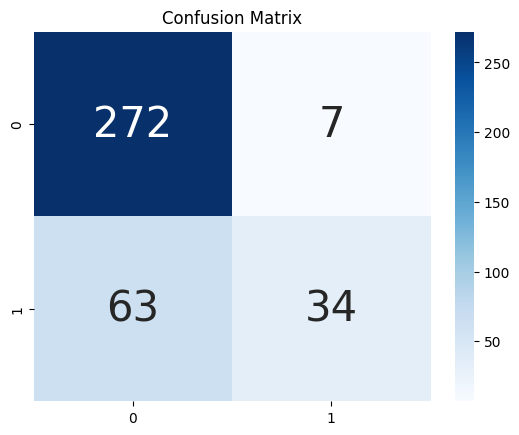

In [91]:
cm = confusion_matrix(y_test_4v, y_pred_4v)
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [92]:
sss2.get_n_splits(X_4vars, y_4vars);

scores_4vars = []

for train_index, test_index in sss2.split(X_4vars, y_4vars):
    X_train, X_test = X_4vars[train_index], X_4vars[test_index]
    y_train, y_test = y_4vars[train_index], y_4vars[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores_4vars.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores_4vars)

[0.8696808510638298, 0.7898936170212766, 0.8085106382978723, 0.7978723404255319, 0.7845744680851063, 0.8351063829787234, 0.7898936170212766, 0.7792553191489362, 0.8164893617021277, 0.8377659574468085, 0.8297872340425532, 0.848404255319149, 0.8218085106382979, 0.8111702127659575, 0.8031914893617021]


### Three variables

In [93]:
X_3vars = af_data.iloc[:, [0, 1, 2]].values
y_3vars = af_data.iloc[:, 6].values
X_train_3v, X_test_3v, y_train_3v, y_test_3v = train_test_split(X_3vars, y_3vars, test_size = 0.25, random_state = 15)

classifier.fit(X_train_3v,y_train_3v)

LogisticRegression(max_iter=500, random_state=0)

In [94]:
y_pred_3v = classifier.predict(X_test_3v)

# Predict probabilities
probs_y_3v=classifier.predict_proba(X_test_3v)

data3v = {'Correct label':y_test_3v, 'Predicted label':y_pred_3v, 'Probability Not Safe':probs_y_3v[:,0],
       'Probability Safe':probs_y_3v[:,1]}
# Create DataFrame
df3v = pd.DataFrame(data3v)
 
# Print the output.
df3v

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.867355,0.132645
1,Not Safe,Not Safe,0.870025,0.129975
2,Not Safe,Not Safe,0.915749,0.084251
3,Safe,Safe,0.416201,0.583799
4,Safe,Not Safe,0.850295,0.149705
...,...,...,...,...
371,Not Safe,Not Safe,0.673237,0.326763
372,Not Safe,Not Safe,0.763661,0.236339
373,Not Safe,Not Safe,0.821034,0.178966
374,Not Safe,Not Safe,0.879603,0.120397


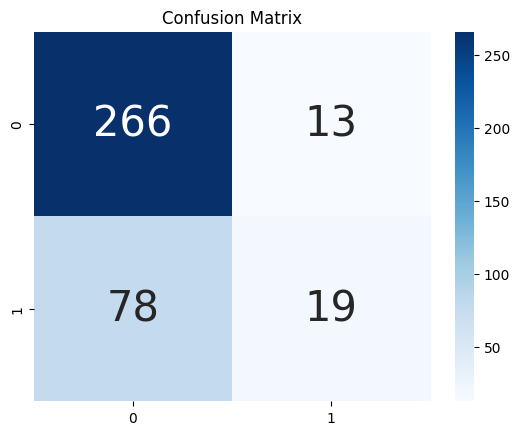

In [95]:
cm = confusion_matrix(y_test_3v, y_pred_3v)
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [96]:
sss2.get_n_splits(X_3vars, y_3vars);

scores_3vars = []

for train_index, test_index in sss2.split(X_3vars, y_3vars):
    X_train, X_test = X_3vars[train_index], X_3vars[test_index]
    y_train, y_test = y_3vars[train_index], y_3vars[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores_3vars.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores_3vars)

[0.8590425531914894, 0.7898936170212766, 0.7712765957446809, 0.8351063829787234, 0.7898936170212766, 0.8218085106382979, 0.7925531914893617, 0.7819148936170213, 0.776595744680851, 0.8218085106382979, 0.776595744680851, 0.8457446808510638, 0.773936170212766, 0.8430851063829787, 0.8297872340425532]


### Two variables

In [97]:
X_2vars = af_data.iloc[:, [0, 1]].values
y_2vars = af_data.iloc[:, 6].values
X_train_2v, X_test_2v, y_train_2v, y_test_2v = train_test_split(X_2vars, y_2vars, test_size = 0.25, random_state = 15)

classifier.fit(X_train_2v,y_train_2v)

LogisticRegression(max_iter=500, random_state=0)

In [98]:
y_pred_2v = classifier.predict(X_test_2v)

# Predict probabilities
probs_y_2v=classifier.predict_proba(X_test_2v)

data2v = {'Correct label':y_test_2v, 'Predicted label':y_pred_2v, 'Probability Not Safe':probs_y_2v[:,0],
       'Probability Safe':probs_y_2v[:,1]}
# Create DataFrame
df2v = pd.DataFrame(data2v)
 
# Print the output.
df2v

,Correct label,Predicted label,Probability Not Safe,Probability Safe
0,Not Safe,Not Safe,0.874994,0.125006
1,Not Safe,Not Safe,0.873547,0.126453
2,Not Safe,Not Safe,0.914975,0.085025
3,Safe,Safe,0.409962,0.590038
4,Safe,Not Safe,0.853708,0.146292
...,...,...,...,...
371,Not Safe,Not Safe,0.674494,0.325506
372,Not Safe,Not Safe,0.766373,0.233627
373,Not Safe,Not Safe,0.824143,0.175857
374,Not Safe,Not Safe,0.886293,0.113707


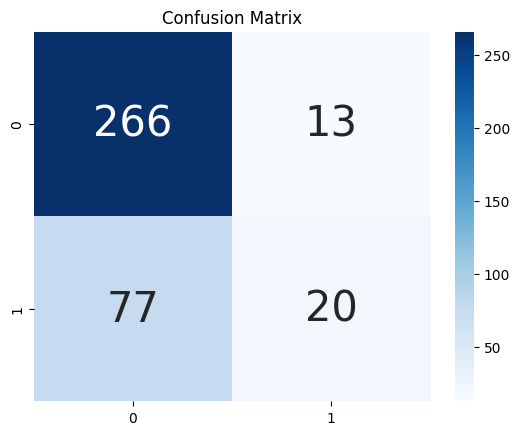

In [99]:
cm = confusion_matrix(y_test_2v, y_pred_2v)
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [100]:
sss2.get_n_splits(X_2vars, y_2vars);

scores_2vars = []

for train_index, test_index in sss2.split(X_2vars, y_2vars):
    X_train, X_test = X_2vars[train_index], X_2vars[test_index]
    y_train, y_test = y_2vars[train_index], y_2vars[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores_2vars.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores_2vars)

[0.8111702127659575, 0.7925531914893617, 0.773936170212766, 0.800531914893617, 0.7898936170212766, 0.7819148936170213, 0.7925531914893617, 0.7819148936170213, 0.773936170212766, 0.7898936170212766, 0.7712765957446809, 0.8058510638297872, 0.773936170212766, 0.8085106382978723, 0.7952127659574468]


## Start of comparisons

In [101]:
x = np.array(scores_4vars)
y = np.array(scores_3vars)
z = np.array(scores_2vars)

In [102]:
x - y

array([ 0.0106383 ,  0.        ,  0.03723404, -0.03723404, -0.00531915,
        0.01329787, -0.00265957, -0.00265957,  0.03989362,  0.01595745,
        0.05319149,  0.00265957,  0.04787234, -0.03191489, -0.02659574])

In [103]:
x - z

array([ 0.05851064, -0.00265957,  0.03457447, -0.00265957, -0.00531915,
        0.05319149, -0.00265957, -0.00265957,  0.04255319,  0.04787234,
        0.05851064,  0.04255319,  0.04787234,  0.00265957,  0.00797872])

In [104]:
y - z

array([ 0.04787234, -0.00265957, -0.00265957,  0.03457447,  0.        ,
        0.03989362,  0.        ,  0.        ,  0.00265957,  0.03191489,
        0.00531915,  0.03989362,  0.        ,  0.03457447,  0.03457447])

Looking at these results, it seems as if the 3 variable model works better than the 2 variable model and the 4 variable model works better than both the 2 and 3 variable models.

In [105]:
logit_model=sm.Logit(y_train == "Safe",sm.add_constant(X_train_4v))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.548449
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1127
Model:                          Logit   Df Residuals:                     1122
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 May 2023   Pseudo R-squ.:                0.003885
Time:                        03:14:24   Log-Likelihood:                -618.10
converged:                       True   LL-Null:                       -620.51
Covariance Type:            nonrobust   LLR p-value:                    0.3061
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8089      0.299     -2.706      0.007      -1.395      -0.223
x1         -1.667e-05    2.3e

In [106]:
logit_model=sm.Logit(y_train == "Safe",sm.add_constant(X_train_3v))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.548449
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1127
Model:                          Logit   Df Residuals:                     1123
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 May 2023   Pseudo R-squ.:                0.003885
Time:                        03:14:24   Log-Likelihood:                -618.10
converged:                       True   LL-Null:                       -620.51
Covariance Type:            nonrobust   LLR p-value:                    0.1853
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8117      0.225     -3.608      0.000      -1.253      -0.371
x1         -1.673e-05   2.26e

In [107]:
logit_model=sm.Logit(y_train == "Safe",sm.add_constant(X_train_2v))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.548712
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1127
Model:                          Logit   Df Residuals:                     1124
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 May 2023   Pseudo R-squ.:                0.003409
Time:                        03:14:24   Log-Likelihood:                -618.40
converged:                       True   LL-Null:                       -620.51
Covariance Type:            nonrobust   LLR p-value:                    0.1206
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9512      0.134     -7.075      0.000      -1.215      -0.688
x1         -1.307e-05    2.2e

# Time to start multiple variable linear regression

I will use only the variable combinations that seemed decent from the logistic regression portion. Note that the results seemed decent, but the p-values showed that the model is not statistically significant.

In [108]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [109]:
X_5vars = af_data_norm.iloc[:, [0,1,2, 3, 4]].values
y = af_data_norm.iloc[:, 5].values

X_lin_5vars = sm.add_constant(X_5vars)
est_5v = sm.OLS(y, X_lin_5vars)
est2_5v = est_5v.fit()
print(est2_5v.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     318.8
Date:                Mon, 08 May 2023   Prob (F-statistic):          1.15e-232
Time:                        03:14:24   Log-Likelihood:                 961.61
No. Observations:                1503   AIC:                            -1911.
Df Residuals:                    1497   BIC:                            -1879.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8349      0.010     79.684      0.0

In [110]:
Xlr_4vars = af_data_norm.iloc[:, [0, 1, 2, 3]].values

X_lin_4vars = sm.add_constant(Xlr_4vars)
est_4v = sm.OLS(y, X_lin_4vars)
est2_4v = est_4v.fit()
print(est2_4v.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     352.1
Date:                Mon, 08 May 2023   Prob (F-statistic):          9.41e-214
Time:                        03:14:24   Log-Likelihood:                 914.78
No. Observations:                1503   AIC:                            -1820.
Df Residuals:                    1498   BIC:                            -1793.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8548      0.011     80.634      0.0

In [111]:
Xlr_3vars = af_data_norm.iloc[:, [0, 1, 2]].values

X_lin_3vars = sm.add_constant(Xlr_3vars)
est_3v = sm.OLS(y, X_lin_3vars)
est2_3v = est_3v.fit()
print(est2_3v.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     373.9
Date:                Mon, 08 May 2023   Prob (F-statistic):          2.99e-181
Time:                        03:14:24   Log-Likelihood:                 836.51
No. Observations:                1503   AIC:                            -1665.
Df Residuals:                    1499   BIC:                            -1644.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8913      0.011     82.885      0.0

In [112]:
Xlr_2vars = af_data_norm.iloc[:, [0, 1]].values

X_lin_2vars = sm.add_constant(Xlr_2vars)
est_2v = sm.OLS(y, X_lin_2vars)
est2_2v = est_2v.fit()
print(est2_2v.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     220.5
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.12e-84
Time:                        03:14:24   Log-Likelihood:                 610.41
No. Observations:                1503   AIC:                            -1215.
Df Residuals:                    1500   BIC:                            -1199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7034      0.008     86.906      0.0

In [113]:
predictions_5v = est2_5v.predict(X_lin_5vars)

Text(0.5, 1.0, 'Predicted vs Actual (5 Variables)')

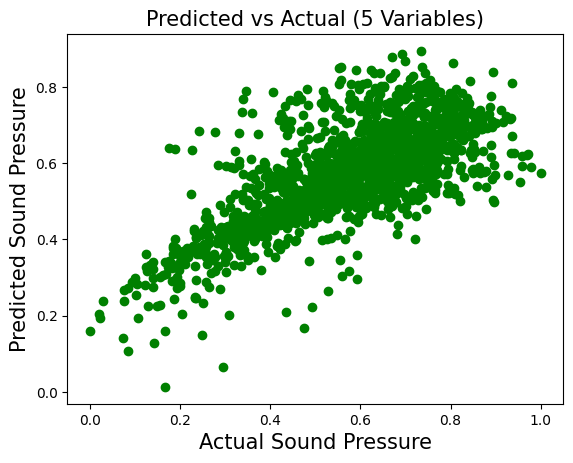

In [122]:
plt.scatter(y, predictions_5v, color='green')
plt.xlabel('Actual Sound Pressure', fontsize=15)
plt.ylabel('Predicted Sound Pressure', fontsize=15)
plt.title('Predicted vs Actual (5 Variables)', fontsize=15)

In [115]:
predictions_4v = est2_4v.predict(X_lin_4vars)

Text(0.5, 1.0, 'Predicted vs Actual (4 Variables)')

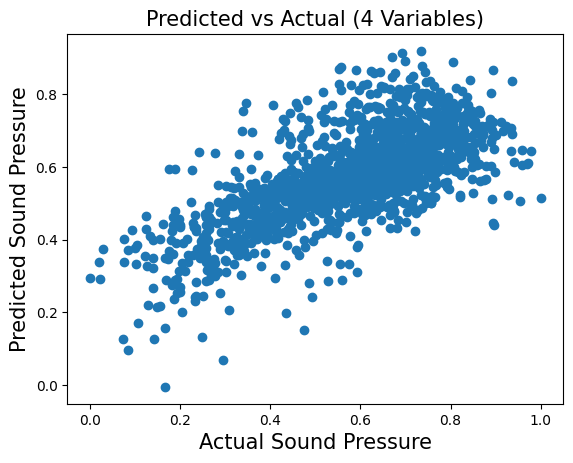

In [120]:
plt.scatter(y, predictions_4v)
plt.xlabel('Actual Sound Pressure', fontsize=15)
plt.ylabel('Predicted Sound Pressure', fontsize=15)
plt.title('Predicted vs Actual (4 Variables)', fontsize=15)

Text(0.5, 1.0, 'Predicted vs Actual (3 Variables)')

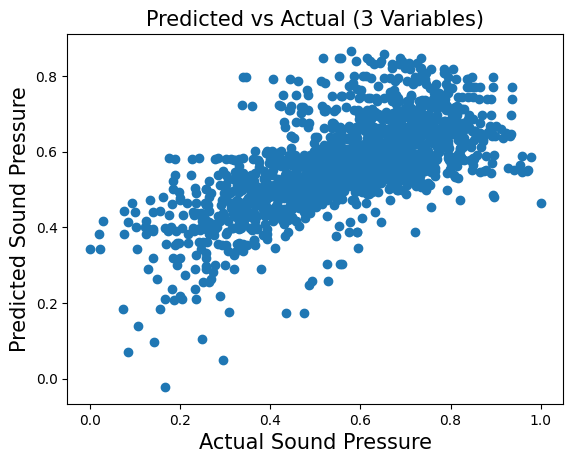

In [117]:
predictions_3v = est2_3v.predict(X_lin_3vars)

plt.scatter(y, predictions_3v)
plt.xlabel('Actual Sound Pressure', fontsize=15)
plt.ylabel('Predicted Sound Pressure', fontsize=15)
plt.title('Predicted vs Actual (3 Variables)', fontsize=15)

Text(0.5, 1.0, 'Predicted vs Actual (5 Variables)')

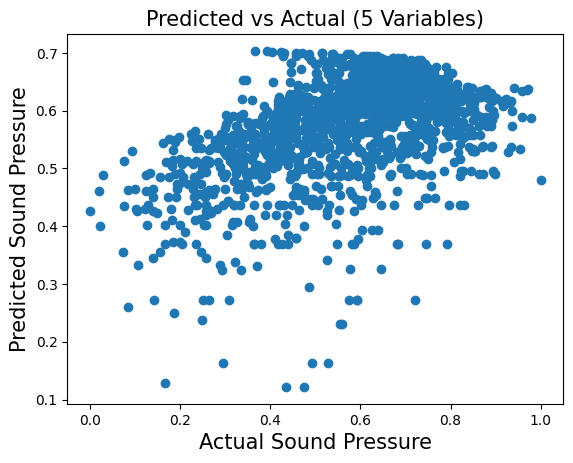

In [118]:
predictions_2v = est2_2v.predict(X_lin_2vars)

plt.scatter(y, predictions_2v)
plt.xlabel('Actual Sound Pressure', fontsize=15)
plt.ylabel('Predicted Sound Pressure', fontsize=15)
plt.title('Predicted vs Actual (5 Variables)', fontsize=15)